<a href="https://colab.research.google.com/github/carlamoema/Imersao_dados_Alura/blob/main/Imersao_dados_4_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [ ]:
n_bairro= dados.Bairro.value_counts()
n_bairro

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

**Criando um DataFrame Metragem por Bairro- MB**

In [ ]:
MB = pd.DataFrame(dados)

Desafio 1 - Realizar a média da metragem para cada um dos bairros.
Calculando a Média do Tamanho (metragem) dos imóveis e agrupando por Bairro.

Desafio 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas)

Opção 1 - Usando a função mean() com groupby.

In [ ]:
#@title
MB.groupby('Bairro')['Metragem'].mean()

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

Opção 2 - Usando o método agg() ou aggregate() com o groupby.

In [ ]:
MB.groupby('Bairro')['Metragem'].agg('mean')

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

Opção 3 - Calculando a média das demais colunas numéricas ainda agrupando por bairro.

In [ ]:
MB.groupby('Bairro').agg('mean')

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,253.056818,3.318182,3.079545,2.909091
Alto da Boa Vista,418.875000,4.125000,5.125000,4.625000
Alto da Lapa,294.337209,3.151163,3.790698,3.906977
Alto da Mooca,270.050000,3.300000,2.600000,3.650000
Alto de Pinheiros,433.444988,3.938875,4.838631,5.004890
...,...,...,...,...
Vila Água Funda,152.200000,2.600000,2.200000,2.600000
Água Branca,191.000000,3.153846,3.076923,2.461538
Água Fria,165.416667,2.833333,3.416667,2.500000


Desafio 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.

1 - plot()
Usando o comando básico plot() em todas as colunas, não é possível visualizar as informações.

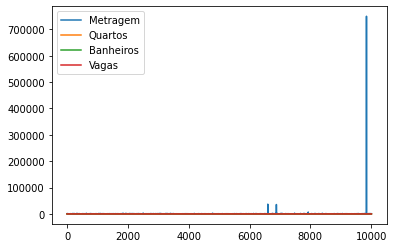

In [ ]:
MB.plot()

2 - Usando plot() mas definindo as médias das colunas que serão usadas (Quartos, Banheiros, Vagas)

In [ ]:
MB.groupby('Bairro').agg('mean')
Medias= MB.groupby('Bairro')["Quartos","Banheiros","Vagas"].agg('mean')
Medias

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Quartos,Banheiros,Vagas
Bairro,,,
Aclimação,3.318182,3.079545,2.909091
Alto da Boa Vista,4.125000,5.125000,4.625000
Alto da Lapa,3.151163,3.790698,3.906977
Alto da Mooca,3.300000,2.600000,3.650000
Alto de Pinheiros,3.938875,4.838631,5.004890
...,...,...,...
Vila Água Funda,2.600000,2.200000,2.600000
Água Branca,3.153846,3.076923,2.461538
Água Fria,2.833333,3.416667,2.500000


Exibindo no gráfico de Barras os 10 bairros com maiores médias de números de quartos nos imóveis.

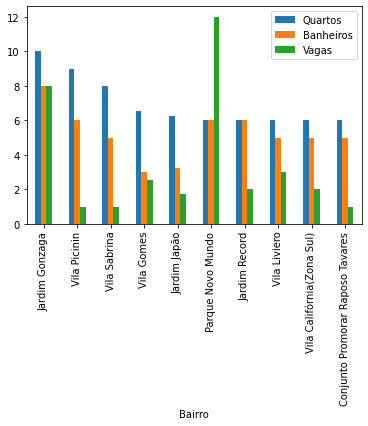

In [ ]:
Medias.sort_values(by = ["Quartos", "Banheiros", "Vagas"], ascending=False)[:10].plot(kind='bar')


A informação agora é exibida em um gráfico de barras horizontais.

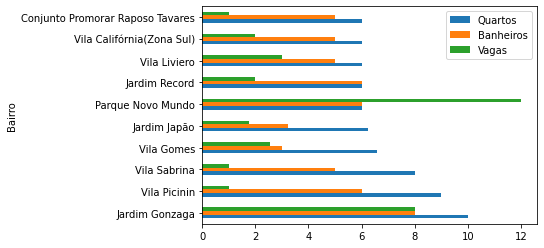

In [ ]:
Medias.sort_values(by = ["Quartos", "Banheiros", "Vagas"], ascending=False)[:10].plot(kind='barh')

Exibindo abaixo, no gráfico de barras horizontais os 10 bairros com imóveis de maior Metragem média mas que não coincidem com os imóveis de maior número de quartos. A base de dados não esclarece o tipo de imóvel (residencial ou comercial) o que pode explicar a divergência nas informações.

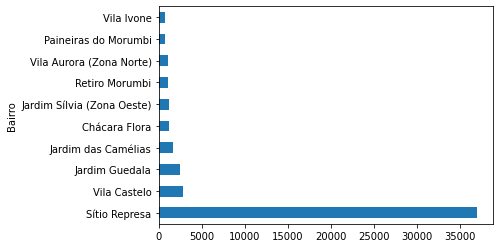

In [ ]:
MB.groupby('Bairro')['Metragem'].agg('mean').sort_values(ascending=False)[:10].plot(kind='barh')

Desafio 4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max).

Listando os 10 maiores imóveis é possível identificar dados repetidos.

In [ ]:
Maiores_i = dados.sort_values(by = "Metragem", ascending=False)[:10]
Maiores_i

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000
6883,NaN,Jardim da Glória,São Paulo,35677,3,3,4,R$ 2.550.000
7930,"Rua Duque de Caxias, 298",Santo Amaro,São Paulo,7126,7,2,20,R$ 80.000\n /Mês
4788,Rua Canuto Borelli,Vila Castelo,São Paulo,2850,3,3,10,R$ 4.000.000
7906,Rua Itassuce,Pacaembu,São Paulo,2505,3,7,12,R$ 12.500.000
7791,Rua Itassuce,Pacaembu,São Paulo,2505,3,7,12,R$ 12.500.000
7067,Rua Itassuce,Pacaembu,São Paulo,2500,3,7,12,R$ 12.500.000
6908,NaN,Retiro Morumbi,São Paulo,2200,6,8,12,R$ 19.000.000
7026,Rua General Pereira da Cunha,Retiro Morumbi,São Paulo,2200,6,9,15,R$ 19.800.000


O Maior imóvel.

In [ ]:
Maiores_i.head(1)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000


O imóvel com maior número de quartos.

In [ ]:
Maiores_i.sort_values(by = "Quartos", ascending=False).head(1)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7930,"Rua Duque de Caxias, 298",Santo Amaro,São Paulo,7126,7,2,20,R$ 80.000\n /Mês


In [ ]:
dados.groupby('Bairro')['Quartos'].agg(['max','min']).head(20)

,max,min
Bairro,,
Aclimação,6,2
Alto da Boa Vista,5,4
Alto da Lapa,5,1
Alto da Mooca,6,2
Alto de Pinheiros,7,2
Aricanduva,3,3
Balneário Mar Paulista,4,4
Barra Funda,4,1
Barro Branco (Zona Norte),6,3


Desafio 5 - Descobrir quais são os bairros que não tem nome de rua. 

In [ ]:
Sem_rua = pd.isnull(dados["Rua"])
(dados[Sem_rua]).groupby(["Bairro"]).first()

,Rua,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
Bairro,,,,,,,
Aclimação,None,São Paulo,180,3,3,4,R$ 2.200.000
Alto da Boa Vista,None,São Paulo,595,4,5,4,R$ 3.000.000
Alto da Lapa,None,São Paulo,170,4,5,6,R$ 1.700.000
Alto da Mooca,None,São Paulo,114,2,2,2,R$ 530.000
Alto de Pinheiros,None,São Paulo,358,4,4,4,R$ 3.500.000
...,...,...,...,...,...,...,...
Vila do Encontro,None,São Paulo,180,4,2,3,R$ 724.000
Água Branca,None,São Paulo,400,4,1,5,R$ 6.500\n /Mês
Água Fria,None,São Paulo,190,3,4,4,R$ 750.000
